# Assignment: Follow-ups to Parameter Estimation notebooks 

**Goal:** work through the `parameter_estimation_fitting_straight_line_I.ipynb` and `amplitude_in_presence_of_background.ipynb` notebooks, doing some of the suggested tasks and answering selected questions, as detailed below.  

## Learning goals:
* Improve your understanding of the Python code in our sample notebooks.
* Be able to articulate basic scaling of fluctuations, the signature of correlations, and the role of priors.
* Gain experience with a basic Bayesian experimental design problem.
* Explore an example of the central limit theorem both analytically and numerically.

## A. Parameter estimation example: fitting a straight line I

1. Step through the notebook and make sure you understand the notation and calculations.  Try writing the requested pieces of Python code; if you have difficulty, study the supplied code instead and identify what parts you don't understand.  (You don't need to hand in anything for this part but please list here any questions you have.)
<br><br>
When you make the function for the flat log prior, you have log(0) assigned to every value between 1 and 1000, but isn't that just regular flat?
<br><br>

2. Do exercise 3: Change the random number seed to get different results and comment on how the maximum likelihood results fluctuate. How is the typical size of fluctuations related to the number of data points $N$ and the data error standard deviation $dy$? E.g., are they proportional to $N$ or $dy^2$ or what?  (Try changing $N$ and $dy$ to test your answer!)
<br><br>
I changed the random seed a few times and found that the slope fluctuates up to 3 away from 25, so the default seed was a little misleading.
I think the error goes like $\frac{1}{\sqrt{N}}$ which is a little hard to see exactly, but I can see that the error scales with just $dy$ by running the same seed and seeing a proportional increase away from the real slope
<br><br>

4. In both sets of joint posterior graphs, are the slope and intercept correlated?  How do you know? Explain how they get correlated.
<br><br>
The slope and intercept are correlated, the primary axes of the elipses are not parallel to the axes.

I can visualize this correlation, imagine that you have some error in the slope, that you fit to a slope that is smaller than the real slope. Then to fit to the points at the points at the end of the graph the intercept should be a little higher. The same goes for the opposite, if the slope is a little too high, the intercept would be a little too low in order to get a good fit through all points. Then there should be a negative correlation between the two, which you can see on the leipses, where it kind of fits to a negative line.
<br><br>

6. For the first set of data, answer the question: "What do you conclude about how the form of the prior affects the final posterior in this case?"
<br><br>
Here the prior does not affect the data meaningfully. Both options are at least decent priors, and since our data is pretty good we approach an answer pretty quickly.
<br><br>

7. For the second set of data, answer the question: "Why in this case does the form of the prior have a clear effect?"  You should consider both the size of the error bars and the number of data points (and try changing them to verify the impact).
<br><br>
For the second set, there is very little data. As said in the notebook, if our data is bad it won't change much about how we see the world. When I change to 2 or one point(s), the effect becomes even more pronounced, with the answers basically just being the priors. When I go to N=3 and dy=5, I go back to seeing the same answer for the 2 priors. With N=3, it takes a dy of 20 to start seeing a clear difference between the 2 priors.
<br><br>


## B. Amplitude of a signal in the presence of background

1. Step through the notebook and make sure you understand the problem and its analysis. You may find the discussion in Section 3.1 of *Sivia and Skilling, Data Analysis: A Bayesian Tutorial* useful (see Carmen modules). You don't need to hand in anything for this part but please list here any questions you have.
<br><br><br><br>

2. Do the "Follow-ups": 
   * *Try both smaller and larger values of D and note the transition in the form of the pdf.*
<br>
The form becomes more gaussian as you go higher
   * At $D=12.5$ the pdf is already looking like a Gaussian (or what most of us imagine a Gaussian to look like).  *Prove that in the limit $D \rightarrow \infty$ that* 
   
    $$
     p(N \mid D) \stackrel{D\rightarrow\infty}{\longrightarrow} \frac{1}{\sqrt{2\pi D}}e^{-(N-D)^2/(2D)}
    $$

You'll want to use Stirling's formula:  $x! \rightarrow \sqrt{2\pi x}e^{-x} x^x$ as $x\rightarrow\infty$.
\[Hint: let $x = N = D(1+\delta)$ where $D\gg 1$ and $\delta \ll 1$.  And use $(1+\delta)^a = e^{a\ln (1+\delta)}$.\]
<br><br>
Take ln of both sides. <br><br>
$ln(P) = Nln(D) - D - ln(N!)$<br><br>
Plug in Stirling's approximation <br><br>
$ln(P) = N ln(D) - D - N ln(N) + N - \frac{1}{2}ln(2\pi N)$<br><br>
Group terms and replace $N$ with $D(1+\delta)$. The last term is of too small an order to matter.<br><br>
$ln(P) = -D(1+\delta)ln(1+\delta)-D+D(1+\delta-\frac{1}{2}ln(2\pi D) - \frac{1}{2}ln(1+\delta)$<br><br>
Simplify and plug in that $ln(1+\delta) \approx \delta - \frac{\delta^2}{2}$<br><br>
$ln(P) = (-D-D\delta)(\delta - \frac{\delta^2}{2}) + D\delta - \frac{1}{2}ln(2\pi D)$<br><br>
Distribute and group terms of order $\delta^3$ or greater, they can be ignored<br><br>
$ln(P) = \frac{D\delta^2}{2} - \frac{1}{2}ln(2\pi D) + O(\delta^3)$<br><br>
Plug in $\delta = \frac{D+N}{D}$ and exponentiating both sides gives our answer. <br><br>
$P = \frac{1}{\sqrt{2\pi D}}e^{-(N-D)^2/(2D)}$
<br><br>
  * *Show that this limit works in practice and visualize how close it is by adding the Gaussian pdf to the plot.* (See [scipy.stats.norm](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html) or define a function yourself.)  **Add code below to make a figure here with the limiting Poisson histogram and the limiting Gaussian pdf.**
<br><br><br><br>

3. Based on your observations in running the different cases (and any additional ones you add), how should you optimally design an experiment to detect the amplitude of the signal given limited resources?  For example: How many counts are needed? How should you bin the data? What $(x_k)_{\rm max}$ should you use? 
<br><br><br><br>


In [1]:
%matplotlib inline  

import numpy as np
from math import factorial

# We'll get our uniform distributions from stats, but there are other ways.
import scipy.stats as stats  
import scipy.integrate as integrate
from scipy import interpolate

import matplotlib.pyplot as plt
import seaborn as sns; sns.set() 

from mpl_toolkits import mplot3d
from matplotlib import cm

plt.rcParams.update({'font.size': 16})

In [2]:
# We'll start with the numbers used by Sivia
A_true = 1.
B_true = 2.
width = np.sqrt(5.)   
x_0 = 0

#def exact_data(A, B, n_0, x_k, x_0=0., width=np.sqrt(5.)):
#    """
#    Return the exact signal plus background.  The overall scale is n_0,
#    which is determined by how long counts are collected. 
#    """
#    return n_0 * (A * np.exp(-(x_k - x_0)**2/(2.*width**2)) + B)

In [3]:
def poisson(N, D):
    """
    Returns a Poisson distribution value with mean D for integer N.
    We require N to be an integer greater than equal to zero.
    """
    assert (isinstance(N, int) and N >= 0), \
            "N must be a non-negative integer!"

    return D**N * np.exp(-D) / factorial(N) 

In [5]:
def gaussian_dist(A, n_0, x_k, x_0=0., width=np.sqrt(5.)):
    return n_0 * (A * np.exp(-(x_k - x_0)**2/(2.*width**2)))

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29]


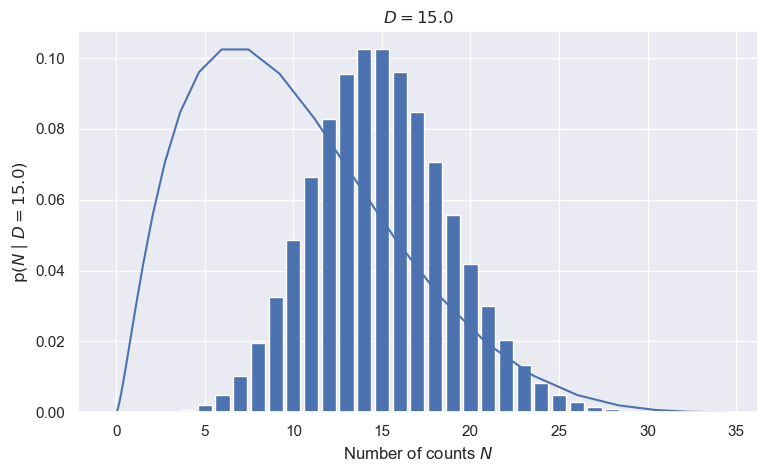

In [24]:
def poisson_plot(ax, D, max_N):
    """
    Make a bar plot on the axis ax of the Poisson distribution for mu = D
    and out to a maximum integer max_N.
    """
    N_pts = np.arange(0, max_N, 1, dtype=int)
    poisson_pts = [poisson(int(N), D) for N in N_pts]
    ax.bar(N_pts, poisson_pts, width=0.8, bottom=None, align='center')
    ax.set_xlabel(r'Number of counts $N$')
    ax.set_ylabel(fr'$\mathrm{{p}}(N \mid D={D:.1f})$')
    ax.set_title(rf'$D = {D:.1f}$')
    return 0

fig = plt.figure(figsize=(15,5))

ax2 = fig.add_subplot(1,2,2)
D2 = 15
max_N2 = 30
poisson_plot(ax2, D2, max_N2)

N_pts = np.arange(0, max_N2, 1, dtype=int)
poisson_pts = [poisson(int(N), D2) for N in N_pts]
ax2.plot(gaussian_dist(15, 2.3, N_pts, width = 8), poisson_pts)
print(N_pts)
fig.tight_layout()